**Step 1: Loading the Dataset And Performing EDA**

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Get basic statistics of the dataset
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Step 2: Preprocessing the Data**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [12]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 3: Comparing the Models and their Prediction**

**LSTM**

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [15]:
# Reshape data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [16]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

In [17]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
20/20 [==============================] - 8s 93ms/step - loss: 0.6808 - accuracy: 0.6971 - val_loss: 0.6672 - val_accuracy: 0.7338
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6490 - accuracy: 0.7378 - val_loss: 0.6292 - val_accuracy: 0.7403
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6033 - accuracy: 0.7476 - val_loss: 0.5803 - val_accuracy: 0.7468
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5433 - accuracy: 0.7443 - val_loss: 0.5340 - val_accuracy: 0.7273
Epoch 5/50
20/20 [==============================] - 0s 10ms/step - loss: 0.4987 - accuracy: 0.7524 - val_loss: 0.5119 - val_accuracy: 0.7403
Epoch 6/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4833 - accuracy: 0.7557 - val_loss: 0.5046 - val_accuracy: 0.7338
Epoch 7/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4682 - accuracy: 0.7736 - val_loss: 0.5025 - val_accuracy: 0.7338
Epoch 8/50
20/20 [

In [18]:
# Evaluate the model
lstm_eval = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {lstm_eval[1]*100:.2f}%")

5/5 [==============================] - 0s 14ms/step - loss: 0.5413 - accuracy: 0.7597
LSTM Model Accuracy: 75.97%


**KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [21]:
# Predict the results
knn_predictions = knn_model.predict(X_test_scaled)

In [22]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Model Accuracy: {knn_accuracy*100:.2f}%")
print(classification_report(y_test, knn_predictions))

KNN Model Accuracy: 69.48%
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



**K-Means Clustering**

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [24]:
# Build the K-Means model
kmeans_model = KMeans(n_clusters=2, random_state=42)

# Train the model
kmeans_model.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [25]:
# Predict the results
kmeans_predictions = kmeans_model.predict(X_test_scaled)

In [26]:
# Evaluate the model
kmeans_confusion = confusion_matrix(y_test, kmeans_predictions)
print("K-Means Confusion Matrix:")
print(kmeans_confusion)

K-Means Confusion Matrix:
[[66 33]
 [24 31]]


**SVM**

In [27]:
from sklearn.svm import SVC

In [28]:
# Build the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [29]:
# Predict the results
svm_predictions = svm_model.predict(X_test_scaled)

In [30]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Model Accuracy: {svm_accuracy*100:.2f}%")
print(classification_report(y_test, svm_predictions))

SVM Model Accuracy: 75.97%
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



**Stock Analysis Chart (Example using Matplotlib for accuracy comparison)**

In [31]:
import matplotlib.pyplot as plt

In [32]:
# Plot accuracy for models
model_names = ['LSTM', 'KNN', 'SVM']
accuracies = [lstm_eval[1], knn_accuracy, svm_accuracy]

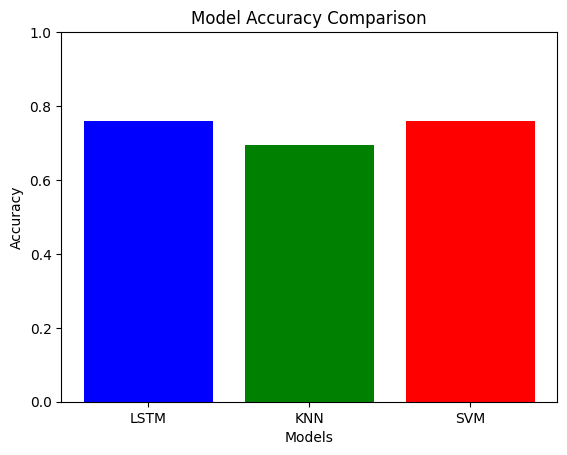

In [33]:
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()